Cluster the reviews that you collected in homework 5, by doing the following:
1.	In Python, select any one of the clustering methods covered in this course. Run it over the collection of reviews, and show at least two different ways of clustering the reviews, e.g., changing k in k-Means clustering or changing where you “cut” in Agnes or Diana.  

2.	Try to write a short phrase to characterize (give a natural interpretation of) what each cluster is generally centered on semantically. Is this hard to do in some cases? If so, make note of that fact. 

3.	Explain which of the two clustering results from question 1 is preferable (if one of them is), and why. 
Submit all of your inputs and outputs and your code for this assignment, along with a brief written explanation of your findings. 


In [43]:
import nltk 
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
from bs4 import BeautifulSoup
from requests import get
import selenium
from selenium import webdriver 
import requests
import json
#nltk.download('omw-1.4')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import ward, dendrogram


In [44]:
url = 'https://www.imdb.com/list/ls095374765/?sort=moviemeter,asc&st_dt=&mode=grid&page=1&ref_=ttls_vw_smp&genres=Thriller'
response = get(url)
html_soup = BeautifulSoup(response.text, 'html.parser')

movieReview = []
reviewTitle = []
movieTitle = []
stop_words = set(stopwords.words("english"))

In [45]:
def list_Of_Reviews(website):
    soup = BeautifulSoup(website, 'html.parser')
    # print(soup)
    f = soup.find_all('div', class_='ipl-icon ipl-star-icon')
    f = soup.find_all('span', class_="rating-other-user-rating")#.find('span').text

    idxPos = -1
    idxNeg = -1

    for idx, i in enumerate(f):
        sp = (f[idx].text.split('/'))
        sp = int(sp[0][-2:])
        if sp > 8:
            idxPos = idx
        elif sp < 4:
            idxNeg = idx
    return([idxNeg,idxPos])

In [46]:
for div in html_soup.findAll('div', attrs={'class':'title'}):
    if len(movieReview) > 100:
        break
    else:
        url = 'https://www.imdb.com' + div.find('a')['href'] 
        url = url + 'reviews'
        response = get(url)
        html_soup = BeautifulSoup(response.text, 'html.parser')
        review_containers = html_soup.find_all('div', class_='text show-more__control')
        title_containers = html_soup.find_all( class_='title')
        
        reviewIndex = list_Of_Reviews(response.content)
        reviewList = []

        if reviewIndex[0] == -1 or reviewIndex[1] == -1:
            pass
        else:
            reviewList.append(review_containers[reviewIndex[0]].text)
            reviewList.append(review_containers[reviewIndex[1]].text)
            reviewTitle.append(title_containers[reviewIndex[0]].string)
            reviewTitle.append(title_containers[reviewIndex[1]].string)
            movieTitle.append(div.string)
            movieTitle.append(div.string)
            count =+ 2
            for i in reviewList:
                review = i.lower()
                #remove punctuation
                review = re.sub('[^a-zA-Z]', ' ', review)
                
                #remove tags
                review = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",review)

                #remove special characters and digits
                review = re.sub("(\\d|\\W)+"," ",review)

                split_text = review.split()
                
                #Lemmatisation
                lem = WordNetLemmatizer()
                split_text = [lem.lemmatize(word) for word in split_text if not word in stop_words and len(word) >2] 
                split_text = " ".join(split_text)
                movieReview.append(split_text)

In [47]:
#show example review
movieReview[15]



'suppose first question many might seeing movie wonder one flight ever drunken captain charge known long time denzel washington one finer actor many role really require stretch much one surprise nominated best actor role whip whitaker former military pilot year good well respected airline pilot day flying florida atlanta fairly short flight leaving really sleep night personal booze sex party one flight attendant nearly oversleeps give kick two line cocaine good vision airline pilot prepare work hear periodically drunken pilot removed cockpit fortunately right flight leaf whip artist control pull non approved maneuver right takeoff fly seam severe weather hand control young pilot one never flown take nap abruptly awakened loud thump heard lose ability control plane widely publicized via trailer film way whip could hope salvage plane invert dive would turn climb achieve level via throttle control crash landing pasture outside atlanta resulted death among board whip hero transpires first 

In [48]:
#title of review from that review above
reviewTitle[15]

' Examines the inner battle of an airline pilot and his alcohol and drug dependency.\n'

In [49]:
#title of the movie from above
movieTitle[15]

'Flight'

In [50]:
count_vectorizer = CountVectorizer(stop_words='english', min_df=0.005)
movieList_v = cosine_similarity(count_vectorizer.fit_transform(movieReview))
words = count_vectorizer.get_feature_names_out()
print(count_vectorizer.get_feature_names_out())

['abandoned' 'abby' 'abducted' ... 'zoom' 'zooming' 'zorro']


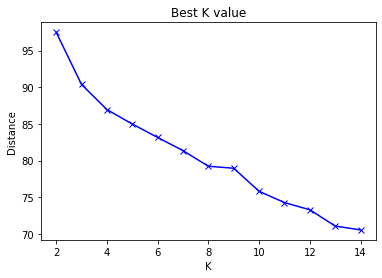

In [51]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
X = movieList_v
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Distance')
plt.title('Best K value')
plt.show()

In [61]:
k = 8
model = KMeans(n_clusters=k, max_iter=200, n_init=10, tol = 0.001)
mod_8 = model.fit(X)
labels=model.labels_

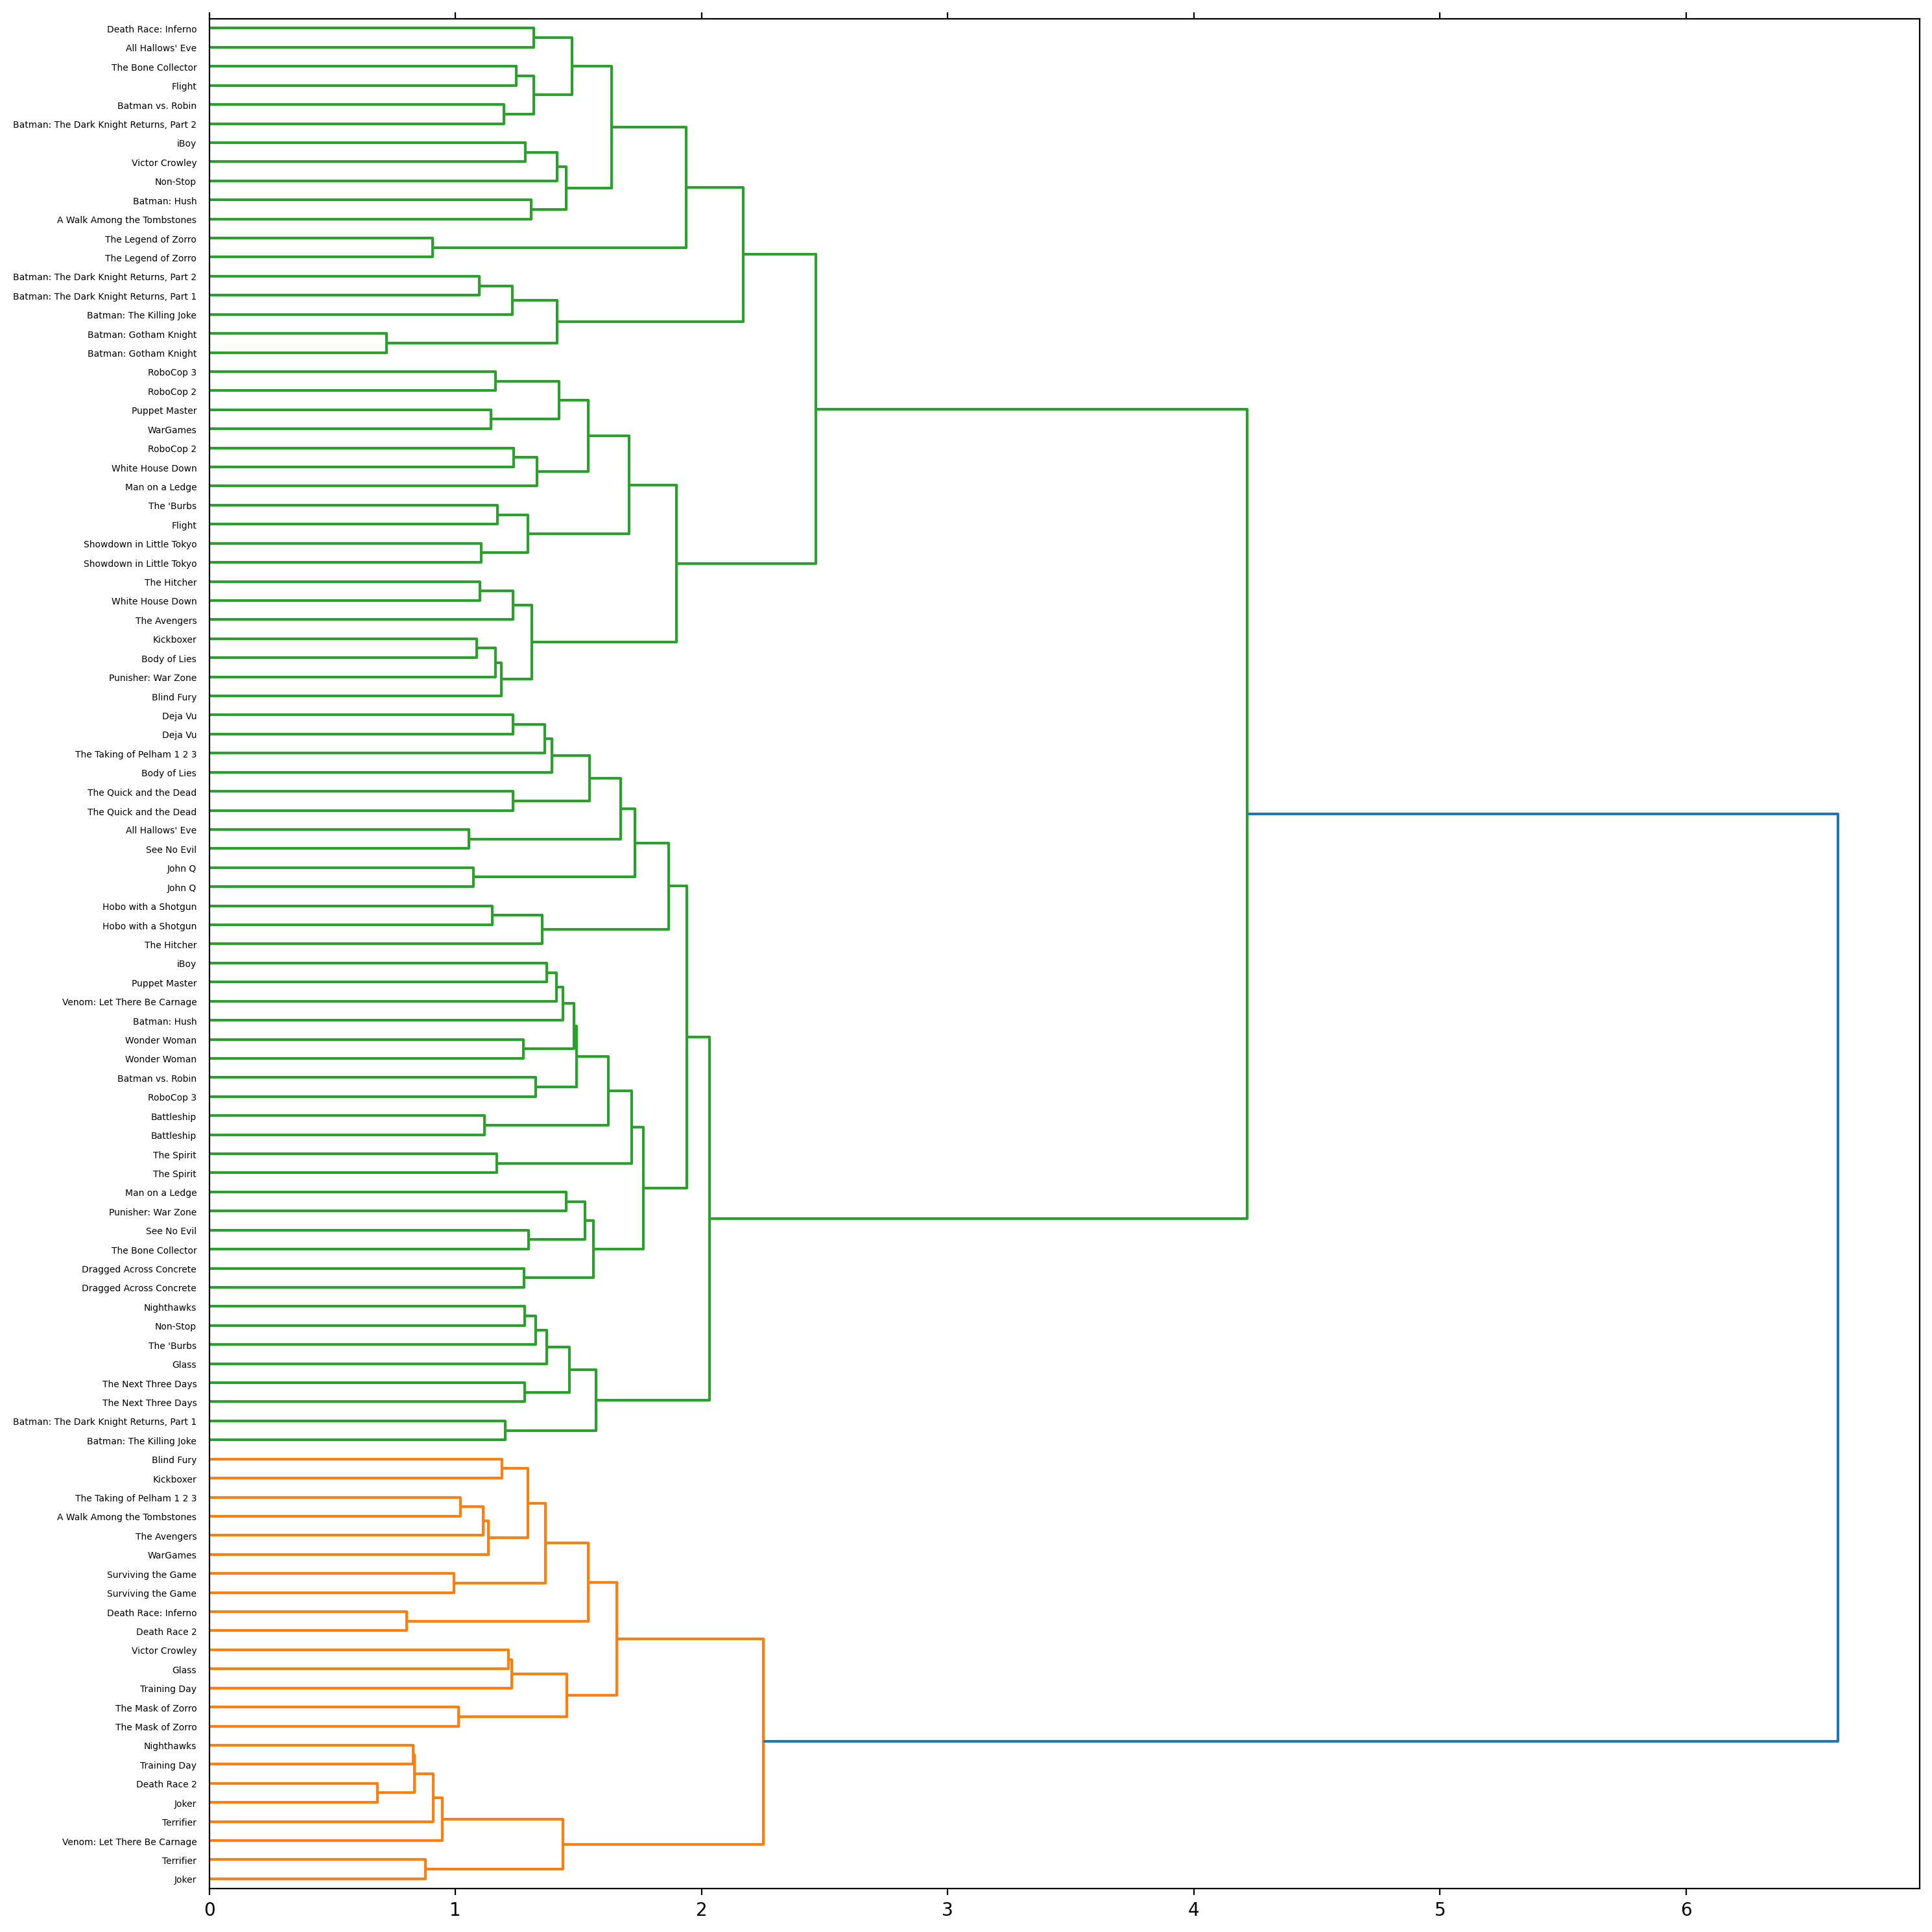

In [63]:
linkage_matrix = ward(movieList_v)

fig, ax = plt.subplots(figsize=(15, 15), dpi = 200)
ax = dendrogram(linkage_matrix, orientation="right", labels=movieTitle);

plt.tick_params(\
    axis= 'x',    
    which='both', 
    bottom='off',     
    top='off',    
    labelbottom='off')

plt.tight_layout()


In [58]:
count_vectorizer = CountVectorizer(stop_words='english', min_df=0.001)
movieList_v = cosine_similarity(count_vectorizer.fit_transform(movieReview))
words = count_vectorizer.get_feature_names_out()
print(count_vectorizer.get_feature_names_out())

['abandoned' 'abby' 'abducted' ... 'zoom' 'zooming' 'zorro']


In [ ]:
k = 3
model = KMeans(n_clusters=k, max_iter=200, n_init=10, tol = 0.001)
mod_8 = model.fit(X)
labels=model.labels_

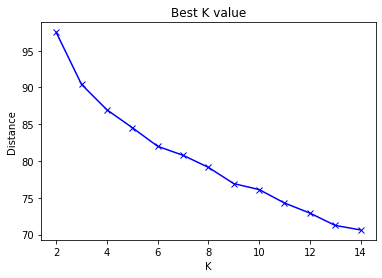

In [59]:
Sum_of_squared_distances = []
X = movieList_v
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k, max_iter=2000, n_init=50)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Distance')
plt.title('Best K value')
plt.show()

### Writeup

2.	Try to write a short phrase to characterize (give a natural interpretation of) what each cluster is generally centered on semantically. Is this hard to do in some cases? If so, make note of that fact. 



Looking at the clusters I believe they were broken up by positive and negitive as I tried to scrape a varity of them in the reives. Two reviews in each cluster shows that many of the reviews from the same movie ended up in the different clusters. However, this was not always the case and I beleive that is because the same words were used in each of the positive and negitive reviews. This shows a low rebustness in the model as many of the clusters would be false positives. The dendrogram above shows two distince clusters of reviews.

3.	Explain which of the two clustering results from question 1 is preferable (if one of them is), and why. 
Submit all of your inputs and outputs and your code for this assignment, along with a brief written explanation of your findings. 

As you can see from my Kmeans elbow plot the model isn't rosbust to chaning the number of Ks since there is not a distinct elbow. Due to this lack of robustness I would not feel conforntable using Kmeans moving forward and I would instead use the cosine simularity count vectorizer like seen in the dengergram since that methid was able to identify two groups.